**ПРОЕКТ: ПРИОРИТИЗАЦИЯ ГИПОТЕЗ И АНАЛИЗ А/В ТЕСТА ДЛЯ ИНТЕРНЕТ-МАГАЗИНА**

**Цель:** Необходимо приоритизировать гипотезы для увеличения выручки, запустить A/B-тест и проанализировать результаты.

## Приоритизация гипотез

### Знакомство с данными и предобработка

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib
register_matplotlib_converters()

In [ ]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')

In [ ]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [ ]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool

In [ ]:
data

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [ ]:
data['ICE'] = data['impact'] * data['confidence'] / data['efforts']

print(data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          hypothesis        ICE
8  Запустить акцию, дающую скидку на товар в день...  16.200000
0  Добавить два новых канала привлечения трафика,...  13.333333
7  Добавить форму подписки на все основные страни...  11.200000
6  Показать на главной странице баннеры с актуаль...   8.000000
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000
1  Запустить собственную службу доставки, что сок...   2.000000
5  Добавить страницу отзывов клиентов о магазине,...   1.333333
3  Изменить структура категорий, что увеличит кон...   1.125000
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000


### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [ ]:
data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']

print(data[['hypothesis', 'RICE']].sort_values(by='RICE',ascending=False))


                                          hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


**Вывод:** по результатам приоритизации гипотез с помощью фреймворков ICE и RICE видим, что по ICE стоит проверять гипотезы под номерами 8, 0 и 7, а по RICE - гипотезы 7, 2, 0 и 6. Разница между наборами гипотез объясняется тем, что в ICE не учитывается количество пользователей, на которое повлияет гипотетическое изменение. В гипотезе 8, этот показатель минимальный - 1 из 10, в то время как в гипотезах 7 и 2 этот показатель равен 10 и 8 соотвественно. Гипотеза 0 имеет невысокий уровень reach, но максимальный показатель impact - 10. Гипотеза 6 имеет высокий показатель confidence. В категоризации ICE самыми релевантными гипотезами стали гипотезы с высокими суммарными показателями impact и confidence и средним показателем efforts - 7, 8, 0.  

## Анализ A/B-теста

### Знакомство с данными и предобработка

In [ ]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [ ]:
visitors.duplicated().sum()

0

In [ ]:
orders.duplicated().sum()

0

In [ ]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

In [ ]:
orders.groupby('group').agg({'visitor_id' : 'nunique'})

,visitor_id
group,
A,503
B,586


In [ ]:
duplicates = orders[['visitor_id', 'group']].groupby('visitor_id').agg({'group' : 'nunique'}).query('group == 2')
duplicates

,group
visitor_id,
8300375,2
199603092,2
232979603,2
237748145,2
276558944,2
351125977,2
393266494,2
457167155,2
471551937,2


In [ ]:
len(orders)

1197

In [ ]:
orders = orders.query('visitor_id not in @duplicates.index')
len(orders)

1016

In [ ]:
orders.groupby('group').agg({'visitor_id' : 'nunique'})

,visitor_id
group,
A,445
B,528


In [ ]:
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [ ]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

**Предобработка данных:** убедились в отсутствии дубликатов в таблицах, привели названия столбцов в единый формат, перевели столбцы с датой в формат datetime, проверили формат данных в других столбцах. Убедились, в том, пользователи распределены на 2 группы.

Отметим, что после проверки уникальных пользователей в обеих группах и удаления дублирующихся пользователей, в группе А осталось 445 пользователей, в группе В - 528, на 83 пользователя или 15% больше.

Анализируем результаты теста за месяц, с 1 августа по 31 августа 2019 года включительно.

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [ ]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
   orders['group'] == x['group'])].agg(
    {'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}
), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
  visitors['group'] == x['group'])].agg(
    {'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}
), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


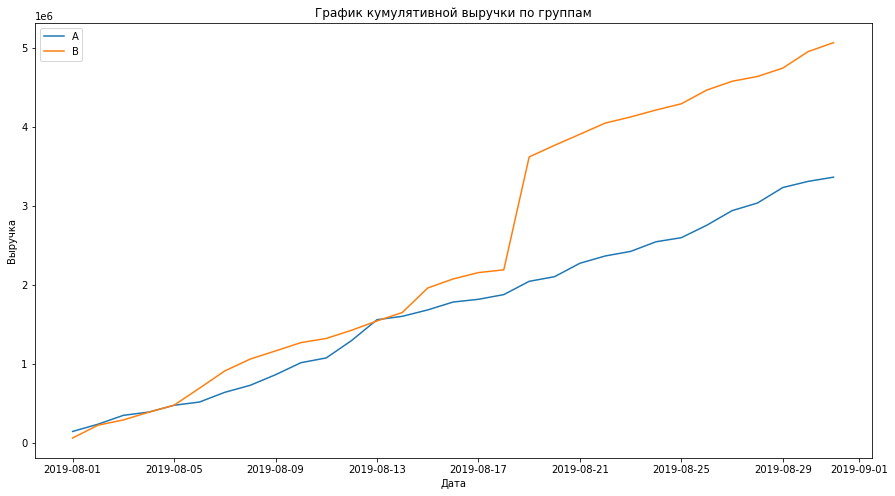

In [ ]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,8))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по группам');

**Вывод:** на графике виден стабильный рост выручки в обеих группах, но группа B показывает более значительный рост, чем группа А. В группе В заметен скачок выручки начиная с 17 дня теста, что может быть увеличением количества заказов, а также повышением среднего чека.

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

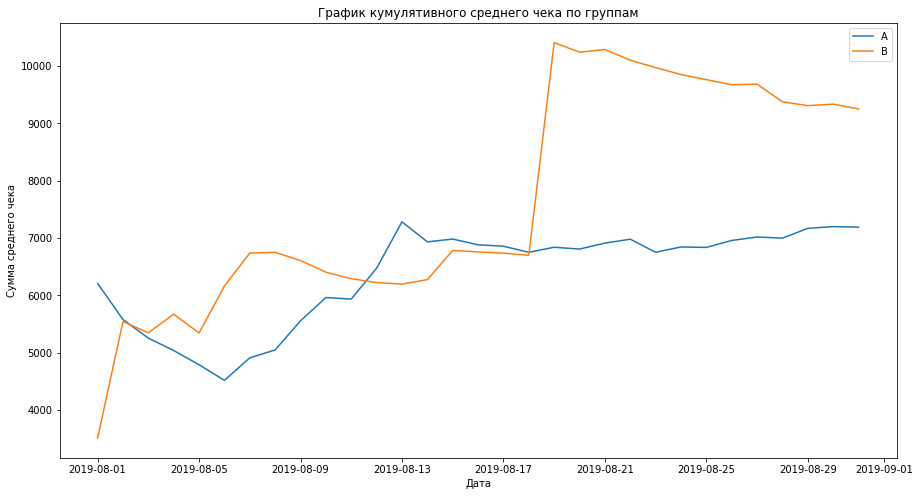

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Сумма среднего чека')
plt.title('График кумулятивного среднего чека по группам')
plt.legend();

**Вывод:** Видим всплески в обеих группах в начале теста, но после 17 дня средний чек стал более стабильным в группе А и резко вырос в группе В почти в 2 раза и уже с этой отметки очень медленно идёт вниз. Здесь также можно сделать предположение о увеличившемся количестве заказов, либо сумме среднего чека.

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.


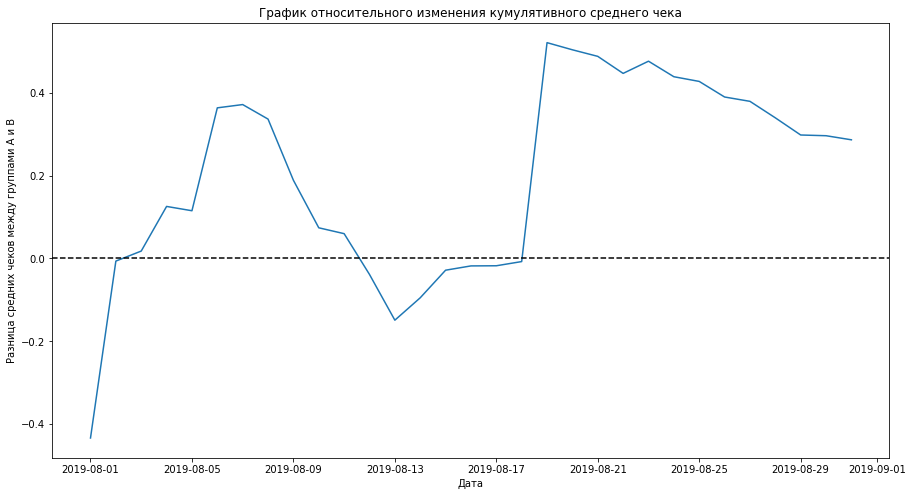

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB,
                                                   left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,8))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'],
 (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Разница средних чеков между группами А и В')
plt.title('График относительного изменения кумулятивного среднего чека');

**Вывод:** по графику сразу виден заметный рост кумулятивного среднего чека группы B с начала теста с провалом с 10 дня на 3 дня, и после, снова значительный рост, более чем на 40%. Это также может быть свидетельством роста средней суммы покупок или просто увеличением количества заказов.

### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

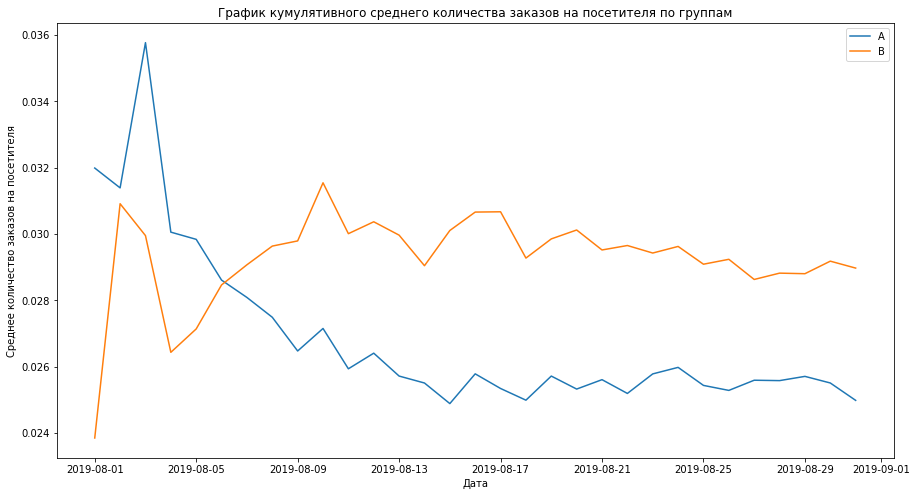

In [ ]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.legend();


**Вывод:** график количества заказов подтверждает предположение об увеличении количества заказов в группе В, на графике видно резкое падение количества заказов в группе с 4 дня и средний стабильный показатель на протяжении всего теста - от 0.026 и до 0.028. В группе В же мы видим стабильно высокий показатель количества заказов относительно группы А в течение всего теста - от 0.028 и до 0.032.

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

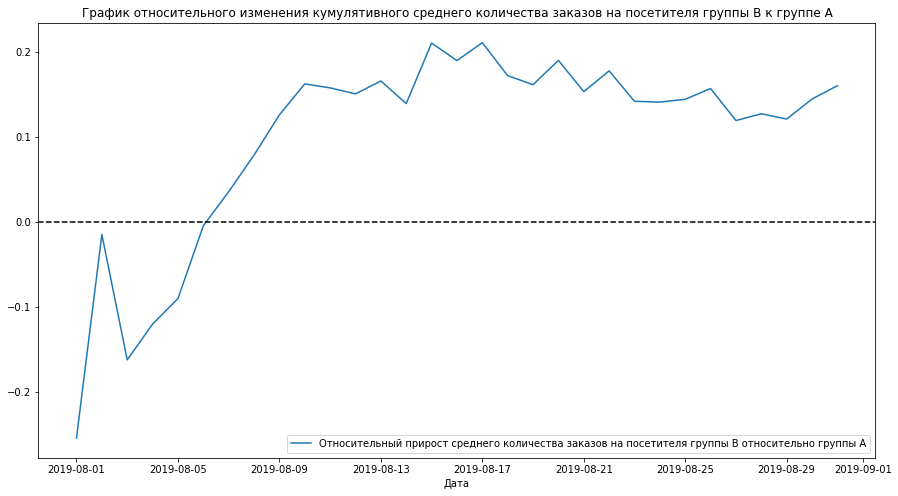

In [ ]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],
                                                                           left_on='date', right_on='date',
                                                                           how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,8))
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
         label="Относительный прирост среднего количества заказов на посетителя группы B относительно группы A")
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.legend()

plt.axhline(y=0, color='black', linestyle='--');

**Вывод:** текущий график визуально также похож на предыдущий и подтверждает относительный рост кумулятивного среднего количества заказов на посетителя группы B к группе A более чем на 10%, иногда достигая показателей в 15-20%.

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

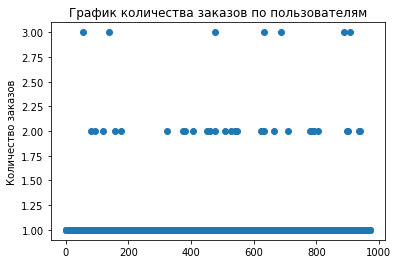

In [ ]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.ylabel('Количество заказов')
plt.title('График количества заказов по пользователям');

**Вывод:** на графике видим, что большинство пользователей делает 1 заказ, однако, есть и пользователи которые делают больше 2 заказов, чтобы понять, насколько велика их доля, нужно рассчитать перцентили.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [ ]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


**Вывод:** не более 5% пользователей делают 1 заказ, и не более 1% делают 2 заказа и более.

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

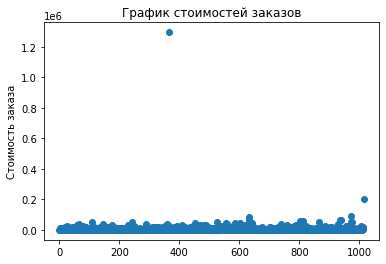

In [ ]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylabel('Стоимость заказа')
plt.title('График стоимостей заказов');

**Вывод:** на графике видно, что почти все показатели стоимости сосредоточены до отметки 0.2 и всего лишь 2 заказа отличаются аномально высокой стоимостью.

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [ ]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


**Вывод:** перцентили подтверждают аномальность значений более 0.2, которые составляют 5% данных и они сдвигают вверх общее распределение.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

**Нулевая:** различий в среднем количестве заказов между группами нет.
**Альтернативная:** различия в среднем между группами есть.

#### Подготовка данных

In [ ]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1, )

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1, )

visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)

ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis=1,
).sort_values(by=['date'])

ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)

ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}), axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB', ]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              14   
4 2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   
3            96890                  77               388030   
4            89908                  99               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54               28

#### Считаем статистическую значимость различия в среднем количестве заказов между группами

In [ ]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique}))

ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique}) )

ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.011
0.160


**Вывод:** статистическая значимость различий среднего количества заказов в группах составила 0.011, что меньше 0.05, поэтому мы можем отвергнуть гипотезу о том, что нет различий между средним количеством заказов между группами, к тому же, прирост среднего количества заказов в группе В составил 16%.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

**Нулевая гипотеза:** различий в среднем чеке между группами нет.
**Альтернативная гипотеза:** различия в среднем чеке между группами есть.

In [ ]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative='two-sided')[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.829
0.287


**Вывод:** статистическая значимость значительно больше 0.05, поэтому мы также не отвергаем гипотезу о том, что нет различий в среднем чеке между группами. Но при этом средний чек группы В в среднем больше среднего чека группы А на 28%.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

#### Избавляемся от аномальных значений в данных

In [ ]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 20000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.count())

76


Убираем аномальные 5% значений в сумме заказов, которые составляют больше 20000 и 1% пользователей, которые совершают более 2 заказов, т.к. значительное количество пользователей делает 1-2 заказа и их нельзя считать аномальными.

#### Считаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по "очищенным данным"

**Нулевая:** различий в среднем количестве заказов между группами нет.
**Альтернативная:** различия в среднем между группами есть.

In [ ]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.01377
0.181


**Вывод:** статистическая значимость все ещё меньше 0.05 и не значительно изменилась и это даёт нам право отвергнуть нулевую гипотезу и допустить, что различия в среднем количестве заказов есть, к тому же показатель разницы между группами все еще 16%.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

**Нулевая гипотеза:** различий в среднем чеке между группами нет.
**Альтернативная гипотеза:** различия в среднем чеке между группами есть.

In [ ]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                ) ]['revenue'], alternative='two-sided')[1] ))

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )]['revenue'].mean()  - 1 ))


0.617
-0.060


**Вывод:** здесь же видим, что все ещё не можем отвергнуть нулевую гипотезу об отсутствии различий между средними чеками групп, плюс разница между ними после очищения данных составила всего лишь 4%.

**Вывод:**
- в сырых данных и в очищенных данных есть статистически значимое различие между средним количеством заказов в группах, в группе В их на ~14% больше в среднем;
- в сырых и очищенных данных p-value для среднего чека составляет 0.8, что не даёт нам отвергнуть нулевую гипотезу об отсутствии различий между средними чеками в группах, после очищения данных среднее различие сократилось с 25% до 2%;
- график относительного изменения среднего чека группы B показывает рост, но имеет большой провал в середине теста, что не позволяет делать однозначные выводы по этому графику;
- график относительного изменения количества заказов на пользователя стабилен, не имеет значительных провалов и показывает стабильный минимальный показатель прироста количества заказов в группе В на 10%, относительно группы А.

**По результатам анализа можно принять решение о приостановке теста и зафиксировать победу группы В**